## Background and Context

You are a Data Scientist for a tourism company named "Visit with us". The Policy Maker of the company wants to enable and establish a viable business model to expand the customer base.

A viable business model is a central concept that helps you to understand the existing ways of doing the business and how to change the ways for the benefit of the tourism sector.

One of the ways to expand the customer base is to introduce a new offering of packages.

Currently, there are 5 types of packages the company is offering - Basic, Standard, Deluxe, Super Deluxe, King. Looking at the data of the last year, we observed that 18% of the customers purchased the packages.

However, the marketing cost was quite high because customers were contacted at random without looking at the available information.

The company is now planning to launch a new product i.e. Wellness Tourism Package. Wellness Tourism is defined as Travel that allows the traveler to maintain, enhance or kick-start a healthy lifestyle, and support or increase one's sense of well-being.

However, this time company wants to harness the available data of existing and potential customers to make the marketing expenditure more efficient.

You as a Data Scientist at "Visit with us" travel company have to analyze the customers' data and information to provide recommendations to the Policy Maker and Marketing Team and also build a model to predict the potential customer who is going to purchase the newly introduced travel package.

## Objective

To predict which customer is more likely to purchase the newly introduced travel package.

## Data Dictionary

### Customer details:

- CustomerID: Unique customer ID
- ProdTaken: Whether the customer has purchased a package or not (0: No, 1: Yes)
- Age: Age of customer
- TypeofContact: How customer was contacted (Company Invited or Self Inquiry)
- CityTier: City tier depends on the development of a city, population, facilities, and living standards. The categories are ordered i.e. Tier 1 > Tier 2 > Tier 3
- Occupation: Occupation of customer
- Gender: Gender of customer
- NumberOfPersonVisiting: Total number of persons planning to take the trip with the customer
- PreferredPropertyStar: Preferred hotel property rating by customer
- MaritalStatus: Marital status of customer
- NumberOfTrips: Average number of trips in a year by customer
- Passport: The customer has a passport or not (0: No, 1: Yes)
- OwnCar: Whether the customers own a car or not (0: No, 1: Yes)
- NumberOfChildrenVisiting: Total number of children with age less than 5 planning to take the trip with the customer
- Designation: Designation of the customer in the current organization
- MonthlyIncome: Gross monthly income of the customer

### Customer interaction data: 

- PitchSatisfactionScore: Sales pitch satisfaction score
- ProductPitched: Product pitched by the salesperson
- NumberOfFollowups: Total number of follow-ups has been done by the salesperson after the sales pitch
- DurationOfPitch: Duration of the pitch by a salesperson to the customer

## Data Structure and Summary

In [52]:
import numpy as np
import pandas as pd
from IPython.display import display

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, StackingClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [2]:
tourism = pd.read_excel(io = 'Tourism.xlsx', sheet_name = 'Tourism')   # read the excel file

In [3]:
df = tourism.copy()   # copy the data to df

In [4]:
df.head()   # display first 5 rows

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [5]:
df.tail()   # display last 5 rows

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
4883,204883,1,49.0,Self Enquiry,3,9.0,Small Business,Male,3,5.0,Deluxe,4.0,Unmarried,2.0,1,1,1,1.0,Manager,26576.0
4884,204884,1,28.0,Company Invited,1,31.0,Salaried,Male,4,5.0,Basic,3.0,Single,3.0,1,3,1,2.0,Executive,21212.0
4885,204885,1,52.0,Self Enquiry,3,17.0,Salaried,Female,4,4.0,Standard,4.0,Married,7.0,0,1,1,3.0,Senior Manager,31820.0
4886,204886,1,19.0,Self Enquiry,3,16.0,Small Business,Male,3,4.0,Basic,3.0,Single,3.0,0,5,0,2.0,Executive,20289.0
4887,204887,1,36.0,Self Enquiry,1,14.0,Salaried,Male,4,4.0,Basic,4.0,Unmarried,3.0,1,3,1,2.0,Executive,24041.0


In [6]:
df.shape

(4888, 20)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

**Observation:**
- The data set has 4888 rows and 20 columns, with both numerical columns and object columns.
- Missing values exist at serveral columns.

In [8]:
df.isnull().sum().sort_values(ascending = False)   # check number of missing values

DurationOfPitch             251
MonthlyIncome               233
Age                         226
NumberOfTrips               140
NumberOfChildrenVisiting     66
NumberOfFollowups            45
PreferredPropertyStar        26
TypeofContact                25
Designation                   0
OwnCar                        0
PitchSatisfactionScore        0
Passport                      0
CustomerID                    0
MaritalStatus                 0
ProdTaken                     0
NumberOfPersonVisiting        0
Gender                        0
Occupation                    0
CityTier                      0
ProductPitched                0
dtype: int64

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,4888.0,202443.500000,1411.188388,200000.0,201221.75,202443.5,203665.25,204887.0
ProdTaken,4888.0,0.188216,0.390925,0.0,0.00,0.0,0.00,1.0
Age,4662.0,37.622265,9.316387,18.0,31.00,36.0,44.00,61.0
CityTier,4888.0,1.654255,0.916583,1.0,1.00,1.0,3.00,3.0
DurationOfPitch,4637.0,15.490835,8.519643,5.0,9.00,13.0,20.00,127.0
NumberOfPersonVisiting,4888.0,2.905074,0.724891,1.0,2.00,3.0,3.00,5.0
NumberOfFollowups,4843.0,3.708445,1.002509,1.0,3.00,4.0,4.00,6.0
PreferredPropertyStar,4862.0,3.581037,0.798009,3.0,3.00,3.0,4.00,5.0
NumberOfTrips,4748.0,3.236521,1.849019,1.0,2.00,3.0,4.00,22.0
Passport,4888.0,0.290917,0.454232,0.0,0.00,0.0,1.00,1.0


In [10]:
df.describe(include = ['object']).T

,count,unique,top,freq
TypeofContact,4863,2,Self Enquiry,3444
Occupation,4888,4,Salaried,2368
Gender,4888,3,Male,2916
ProductPitched,4888,5,Basic,1842
MaritalStatus,4888,4,Married,2340
Designation,4888,5,Executive,1842


**Observation:**
- Out of 20 columns, 8 columns have missing values. But the number of missing values is acceptable compared to the total number of observations. We can try to impute them.
- CustomerID seems to be just an index that doesn't help with our prediction. Should drop it before model building.
- Remarkable difference exists between the 3rd quantile and the maximum in DurationOfPitch, indicating the presence of outliers. So does MonthlyIncome.
- Gender has 3 unique values, which needs further investigation.
- Multiple columns should be converted to categorical variables.

## Data Pre-processing

### Drop CustomerID

In [11]:
df.drop('CustomerID', axis = 1, inplace = True)

### Convert to category

In [12]:
category_cols = df.select_dtypes(include = 'object').columns.to_list() + ['ProdTaken', 'CityTier', 'PreferredPropertyStar', 'Passport', 'PitchSatisfactionScore', 'OwnCar']
# convert object and some of numerical variables into categorical variables

for col in category_cols:
    df[col] = df[col].astype('category')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   ProdTaken                 4888 non-null   category
 1   Age                       4662 non-null   float64 
 2   TypeofContact             4863 non-null   category
 3   CityTier                  4888 non-null   category
 4   DurationOfPitch           4637 non-null   float64 
 5   Occupation                4888 non-null   category
 6   Gender                    4888 non-null   category
 7   NumberOfPersonVisiting    4888 non-null   int64   
 8   NumberOfFollowups         4843 non-null   float64 
 9   ProductPitched            4888 non-null   category
 10  PreferredPropertyStar     4862 non-null   category
 11  MaritalStatus             4888 non-null   category
 12  NumberOfTrips             4748 non-null   float64 
 13  Passport                  4888 non-null   catego

### Check unique values in categorical columns

In [14]:
for col in category_cols:
    print(df[col].value_counts(ascending = False))
    print('')

Self Enquiry       3444
Company Invited    1419
Name: TypeofContact, dtype: int64

Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: Occupation, dtype: int64

Male       2916
Female     1817
Fe Male     155
Name: Gender, dtype: int64

Basic           1842
Deluxe          1732
Standard         742
Super Deluxe     342
King             230
Name: ProductPitched, dtype: int64

Married      2340
Divorced      950
Single        916
Unmarried     682
Name: MaritalStatus, dtype: int64

Executive         1842
Manager           1732
Senior Manager     742
AVP                342
VP                 230
Name: Designation, dtype: int64

0    3968
1     920
Name: ProdTaken, dtype: int64

1    3190
3    1500
2     198
Name: CityTier, dtype: int64

3.0    2993
5.0     956
4.0     913
Name: PreferredPropertyStar, dtype: int64

0    3466
1    1422
Name: Passport, dtype: int64

3    1478
5     970
1     942
4     912
2     586
Name: PitchSatisfactionScore, d

**Observation:**
- Should combine "Female" and "Fe Male" at column Gender.
- Should combine "Single" and "Unmarried" at column MaritalStatus.

### Fix Gender and MaritalStatus Column

In [15]:
df.Gender.replace('Fe Male', 'Female', inplace = True)
df.MaritalStatus.replace('Unmarried', 'Single', inplace = True)

### Data Summary

In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,4662.0,37.622265,9.316387,18.0,31.0,36.0,44.0,61.0
DurationOfPitch,4637.0,15.490835,8.519643,5.0,9.0,13.0,20.0,127.0
NumberOfPersonVisiting,4888.0,2.905074,0.724891,1.0,2.0,3.0,3.0,5.0
NumberOfFollowups,4843.0,3.708445,1.002509,1.0,3.0,4.0,4.0,6.0
NumberOfTrips,4748.0,3.236521,1.849019,1.0,2.0,3.0,4.0,22.0
NumberOfChildrenVisiting,4822.0,1.187267,0.857861,0.0,1.0,1.0,2.0,3.0
MonthlyIncome,4655.0,23619.853491,5380.698361,1000.0,20346.0,22347.0,25571.0,98678.0


In [17]:
df.describe(include = 'category').T

,count,unique,top,freq
ProdTaken,4888,2,0,3968
TypeofContact,4863,2,Self Enquiry,3444
CityTier,4888,3,1,3190
Occupation,4888,4,Salaried,2368
Gender,4888,2,Male,2916
ProductPitched,4888,5,Basic,1842
PreferredPropertyStar,4862.0,3.0,3.0,2993.0
MaritalStatus,4888,3,Married,2340
Passport,4888,2,0,3466
PitchSatisfactionScore,4888,5,3,1478


## EDA

### Univariate Analysis

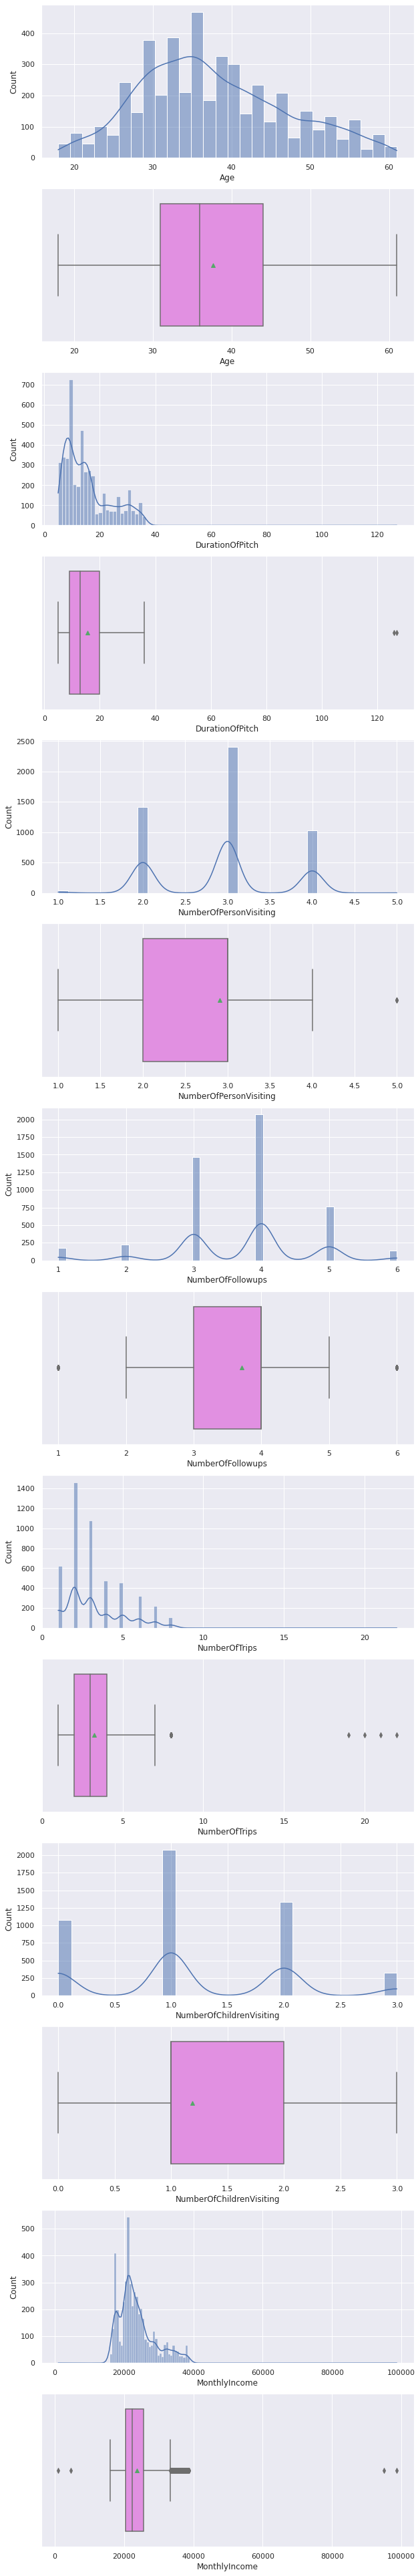

In [18]:
plt.figure(figsize = (10, 70))
for i, col in enumerate(df.select_dtypes(include = 'number').columns.to_list()):
    plt.subplot(14, 1, 2 * i + 1)
    sns.histplot(df[col], kde = True)     # histogram
    plt.subplot(14, 1, 2 * i + 2)
    sns.boxplot(x = df[col], color = 'violet', showmeans = True)   # box plot

**Observation:**
- Age is approximately normal distribution, with mean of 37.6 and median of 36.
- DurationOfPitch is right-skewed, with a few outliers beyond 120.
- Most customers plan to take the trip with 2- 4 people.
- Usually, salesperson need to follow up with customers after the sales pitch 3 - 4 times.
- Although most customers take less than 4 trips per year, some outliers take more than 20 trips a year.
- MonthlyIncome mainly ranges from 15000 to 40000, with both outliers on both ends.

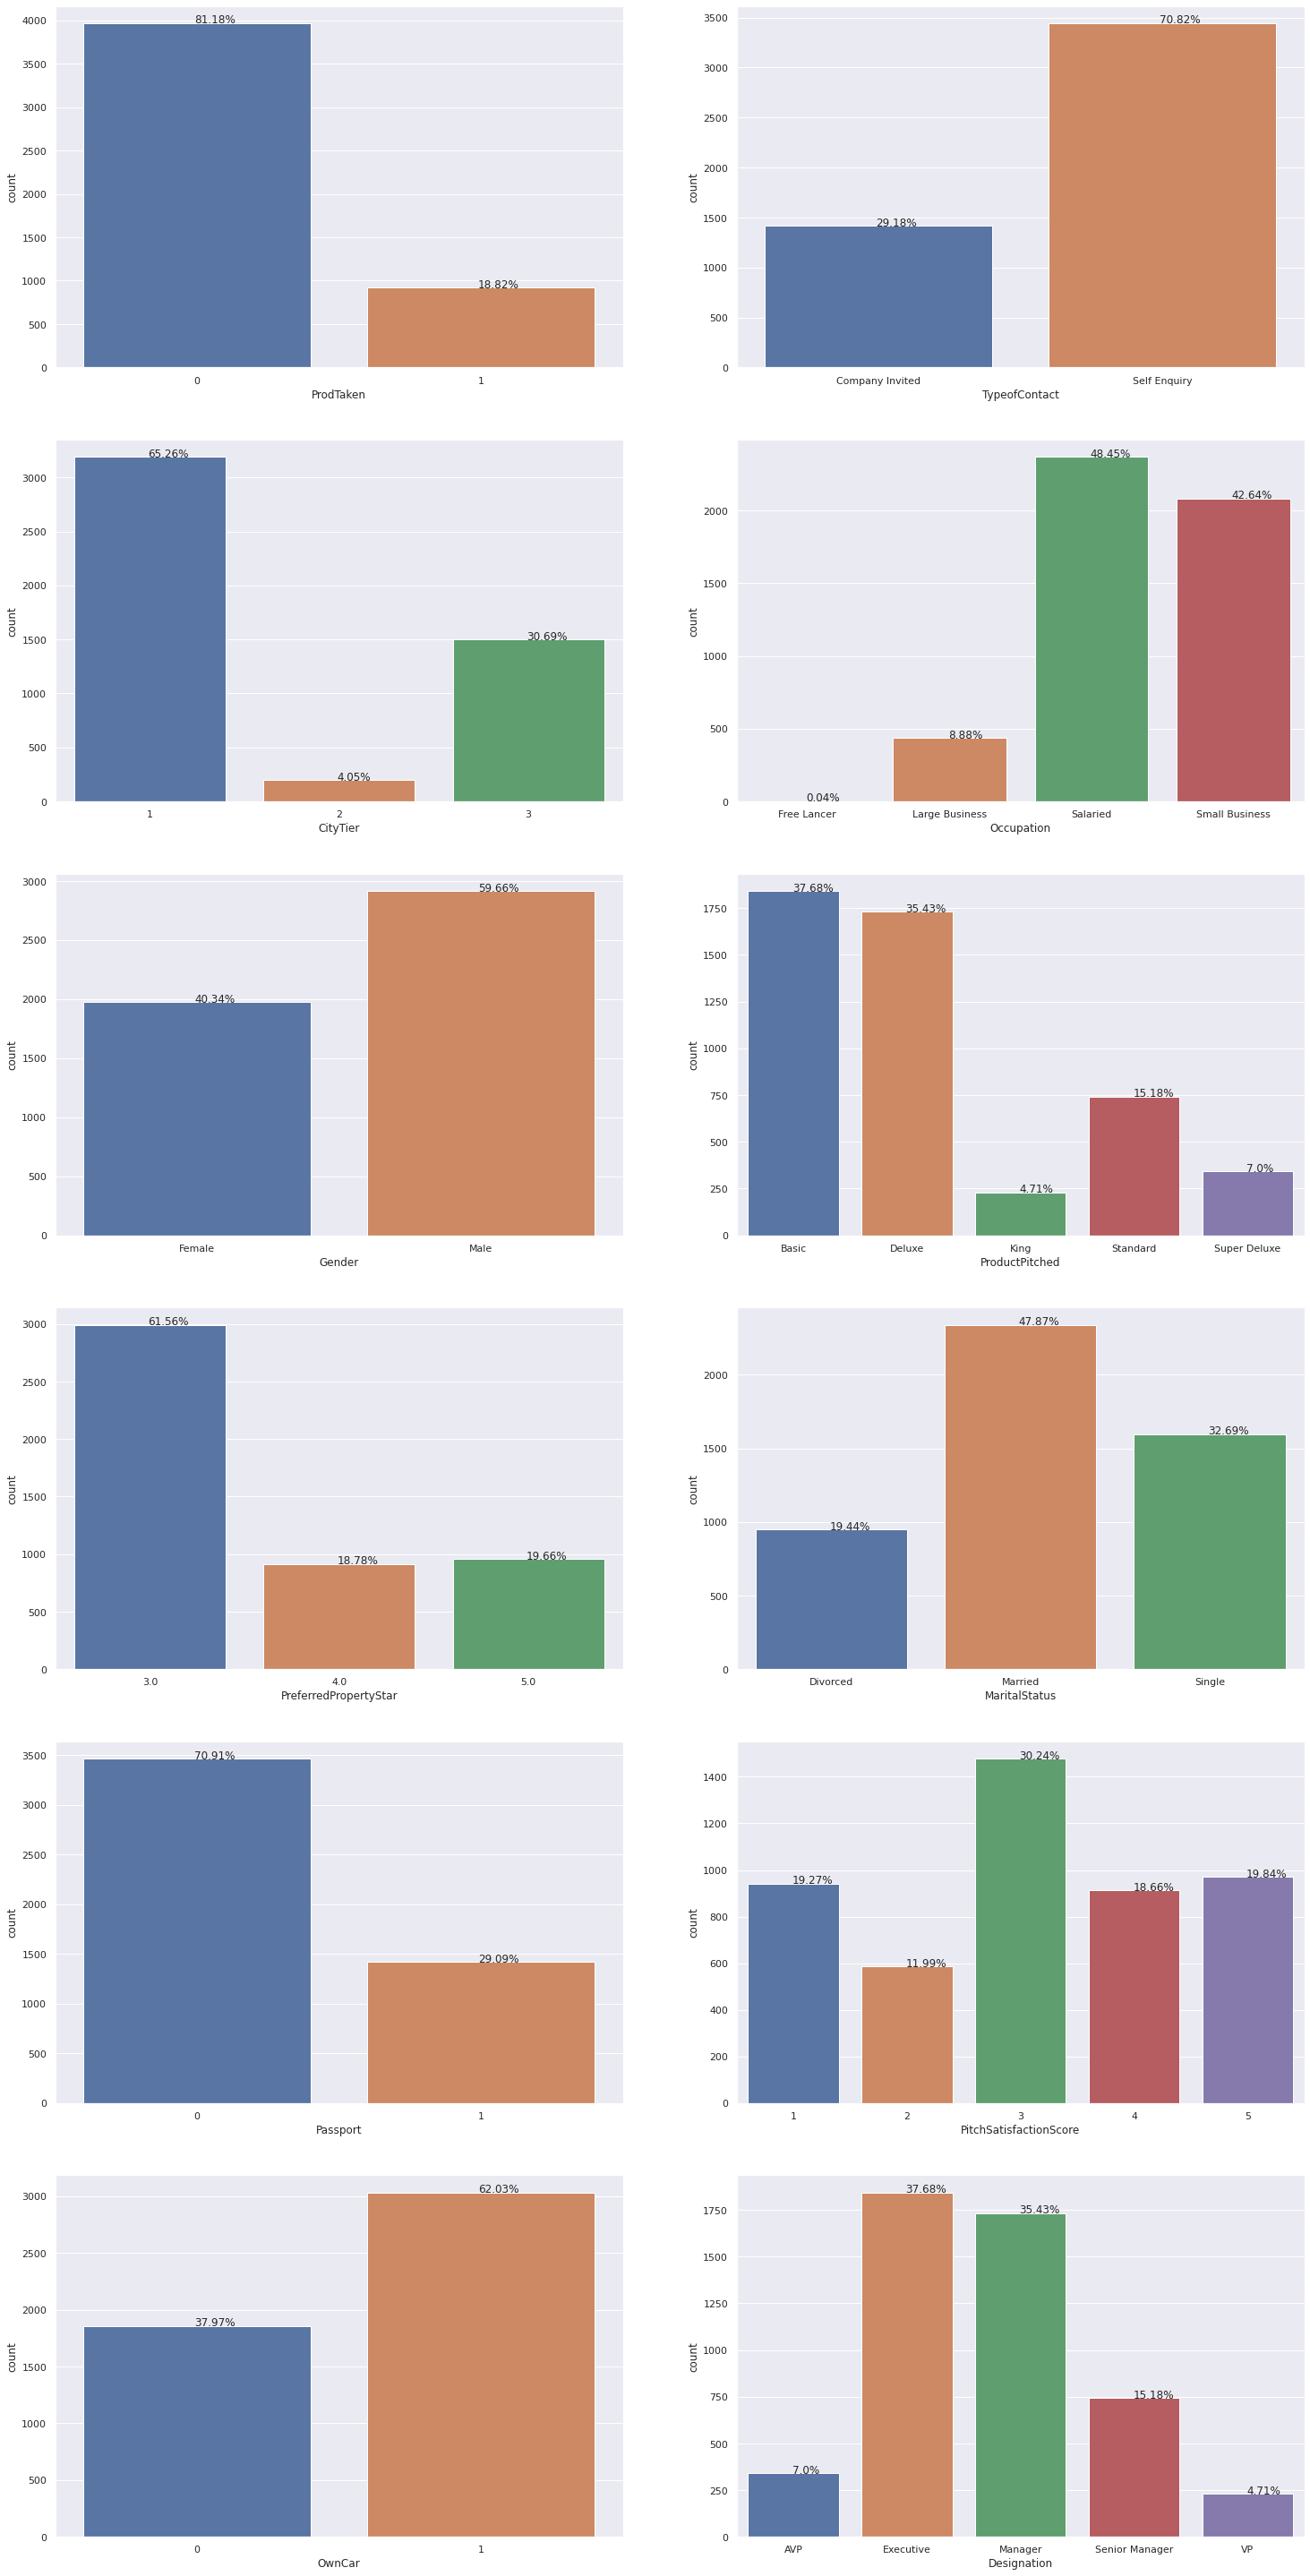

In [20]:
plt.figure(figsize = (25, 52))
for i, col in enumerate(df.select_dtypes(include = 'category').columns.to_list()):
    plt.subplot(6, 2, i + 1)
    ax = sns.countplot(x = col, data = df)   # count plot
    total = df[col].notnull().sum()
    for p in ax.patches:
        percent = round(100 * p.get_height() / total, 2)
        x = p.get_x() + p.get_width() / 2 - 0.01
        y = p.get_y() + p.get_height() + 0.01
        ax.annotate(str(percent) + '%', (x, y), fontsize = 12)

**Observation:**
- The class lables are imbalanced. About 81% of the customers didn't buy the package and only 19% accepted it.
- About 70% of the customers was contacted by Self Inquiry.
- Most customers came from Tier 1 cities, followed by Tier 3 cities.
- Most customers are Salaried or engaged in small business, with the designation of manager or executive.
- 60% of the customers are male.
- Among five packages, Basic and Deluxe are the most popular.
- Most customers prefer hotel property with rating of 3, own cars and don't have passport.
- The most common category of our cusotmers' marital status is married, followed by single.
- Most customers scored their sales pitch satisfaction for at least 3, that is medium or satisfied.

### Bivariate Analysis

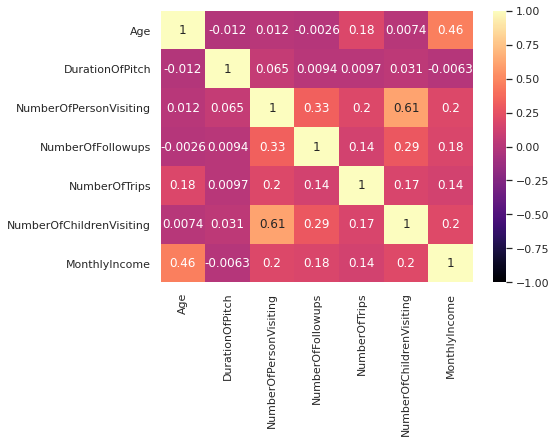

In [30]:
plt.figure(figsize = (7,5))
sns.heatmap(df.corr(), annot = True, vmin = -1, vmax = 1, cmap = 'magma');

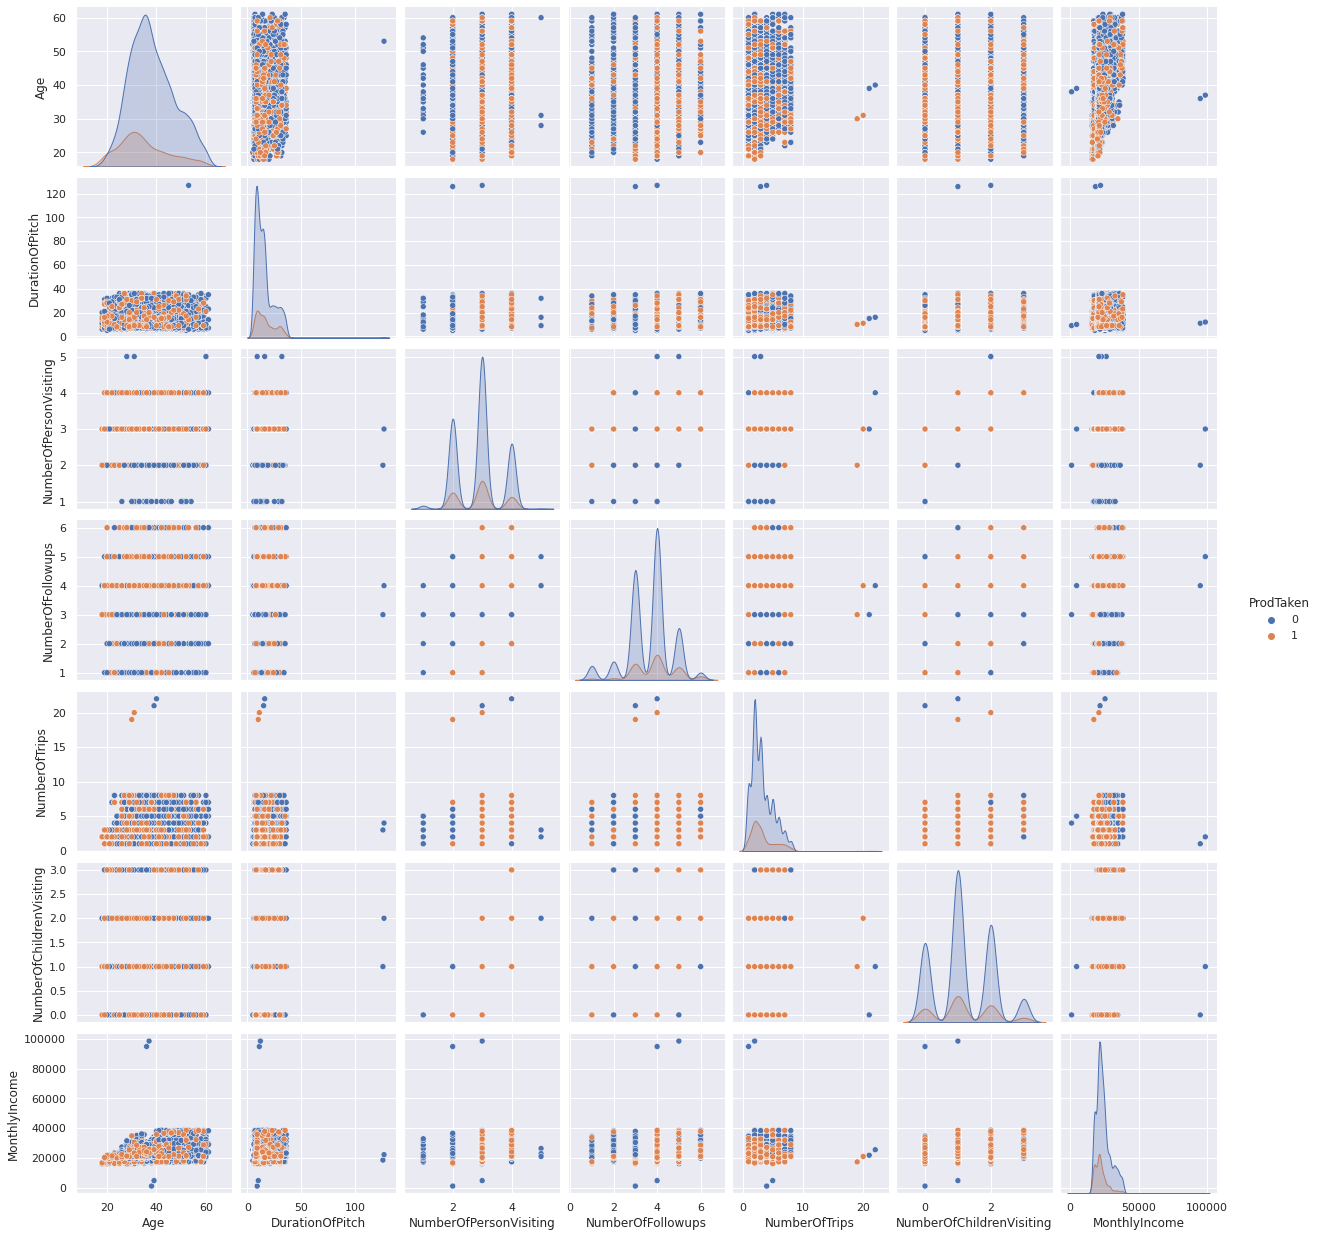

In [24]:
sns.pairplot(data = df, hue = 'ProdTaken');

**Observation:**
- Age and MonthlyIncome have moderate positive correlation.
- NumberOfPersonVisiting and NumberOfChildrenVisiting have moderate positive correlation.

In [322]:
def stacked_bar(index, col): 
    """
    This function is to show the stacked bar plot for the crosstab between df[index] and df[col].
    """
    pd.crosstab(index = [df[i] for i in index], columns = df[col], normalize = 'index').plot(kind = 'bar', stacked = True, figsize = (len(index) * 7,4));
    plt.xticks(rotation = 45);
    plt.legend(loc = 'lower right');

In [211]:
def boxplot_with_and_without_outliers(cat_col, num_col, hue = None):
    """
    This function is to show the box plot with/ without outliers for df[cat_col] and df[num_col], in terms of df[hue].
    """
    plt.figure(figsize = (20,5));
    plt.subplot(1, 2, 1);
    sns.boxplot(x = cat_col, y = num_col, hue = hue, data = df);
    plt.title('With outliers');
    plt.subplot(1, 2, 2);
    sns.boxplot(x = cat_col, y = num_col, hue = hue, data = df, showfliers = False);
    plt.title('Without outliers');

### ProdTaken vs Age

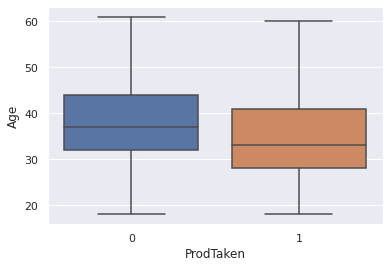

In [31]:
sns.boxplot(x = 'ProdTaken', y = 'Age', data = df);

**Observation:** Younger customers tend to buy the package. 

### ProdTaken vs TypeofContact

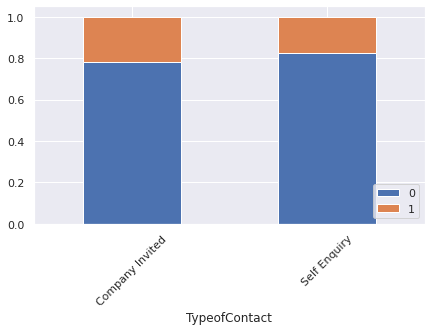

In [323]:
stacked_bar(['TypeofContact'], 'ProdTaken')

**Observation:** Type of contact doesn't play an important role in package acceptance.

### ProdTaken vs CityTier

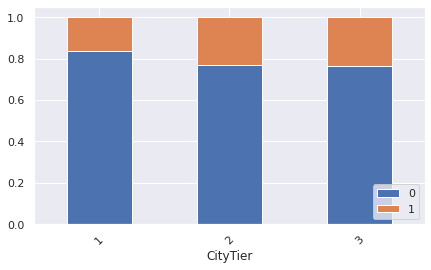

In [320]:
stacked_bar(['CityTier'], 'ProdTaken')

**Observation:** Customers from Tier 2 and Tier 3 cities are more likely to accept the package.

### ProdTaken vs Occupation

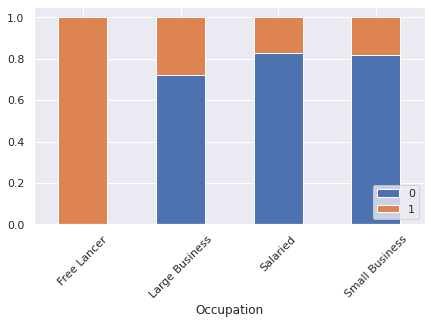

In [321]:
stacked_bar(['Occupation'], 'ProdTaken')

**Observation:** Customers from large business are more likely to accept the package. Let's take a look at the records of free lancer:

In [341]:
df[df.Occupation == 'Free Lancer']

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
2446,1,38.0,Self Enquiry,1,9.0,Free Lancer,Male,4,5.0,Basic,3.0,Single,8.0,1,3,0,1.0,Executive,20768.0


**Observation:** The sample size of free lancer is too small. No definite conclusion could be drawn from it.

### ProdTaken vs Designation

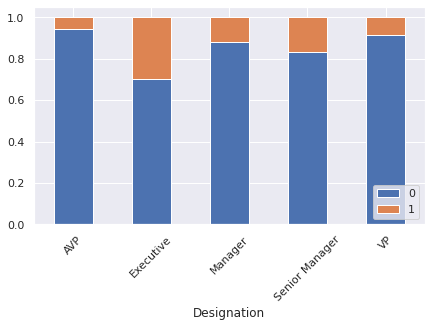

In [324]:
stacked_bar(['Designation'], 'ProdTaken')

**Observation:** Customers with the title of executive are most likely to buy the package, followed by senior manager.

### ProdTaken vs Gender

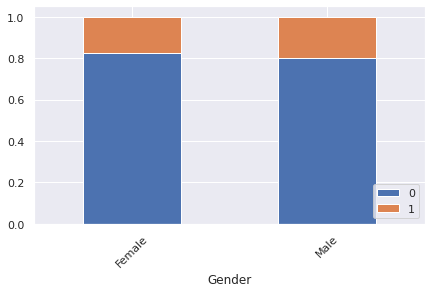

In [325]:
stacked_bar(['Gender'], 'ProdTaken')

**Observation:** Gender makes little difference in purchase decision.

### ProdTaken vs NumberOfPersonVisiting

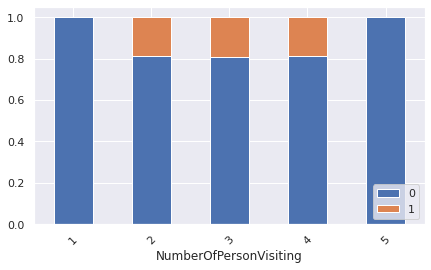

In [326]:
stacked_bar(['NumberOfPersonVisiting'], 'ProdTaken')

**Observation:** Customers with 2 - 4 people to take the trip are more likely to buy the package.

### ProdTaken vs NumberOfChildrenVisiting

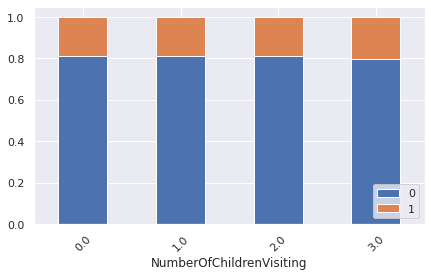

In [327]:
stacked_bar(['NumberOfChildrenVisiting'], 'ProdTaken')

**Observation:** The number of children with age less than 5 planning to take the trip with the customer doesn't affect the purchase decision.

### ProdTaken vs PreferredPropertyStar

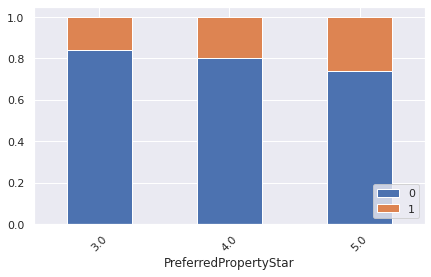

In [328]:
stacked_bar(['PreferredPropertyStar'], 'ProdTaken')

**Observation:**  Customers who prefer hotels with higher ratings are more likely to become buyers. 

### ProdTaken vs MaritalStatus

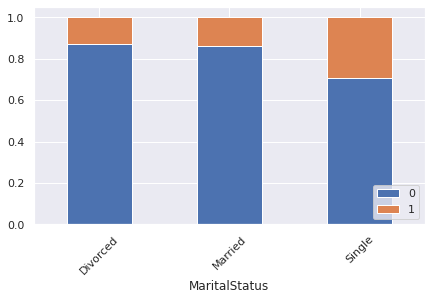

In [329]:
stacked_bar(['MaritalStatus'], 'ProdTaken')

**Observation:** Single customers are more likely to become buyers.

### ProdTaken vs NumberOfTrips

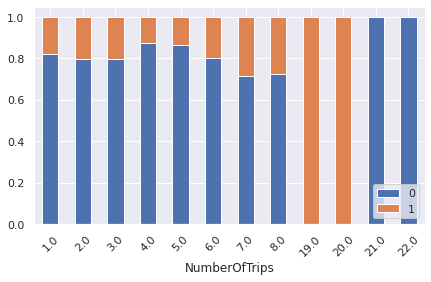

In [339]:
stacked_bar(['NumberOfTrips'], 'ProdTaken')

**Observation:** When NumberOfTrips is less than 9, no pattern presents. Let's take a look at the records of NumberOfTrips >= 19: 

In [340]:
df[df.NumberOfTrips >= 19]

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
385,1,30.0,Company Invited,1,10.0,Large Business,Male,2,3.0,Basic,3.0,Single,19.0,1,4,1,1.0,Executive,17285.0
816,0,39.0,Company Invited,1,15.0,Salaried,Male,3,3.0,Deluxe,4.0,Single,21.0,0,2,1,0.0,Manager,21782.0
2829,1,31.0,Company Invited,1,11.0,Large Business,Male,3,4.0,Basic,3.0,Single,20.0,1,4,1,2.0,Executive,20963.0
3260,0,40.0,Company Invited,1,16.0,Salaried,Male,4,4.0,Deluxe,4.0,Single,22.0,0,2,1,1.0,Manager,25460.0


**Observation:**  It turns out that the sample size of NumberOfTrips >= 19 is very small. No definite conclusion could be drawn from such few samples. Therefore, the number of trips a customer takes in a year doesn't affect the purchase decision.

### ProdTaken vs Passport

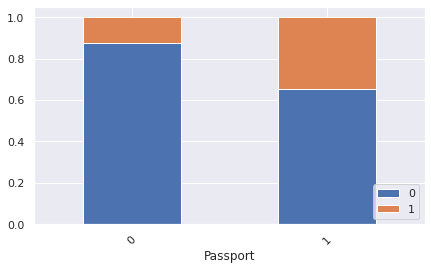

In [330]:
stacked_bar(['Passport'], 'ProdTaken')

**Observation:** People with passport are more likely to buy travel package.

### ProdTaken vs OwnCar

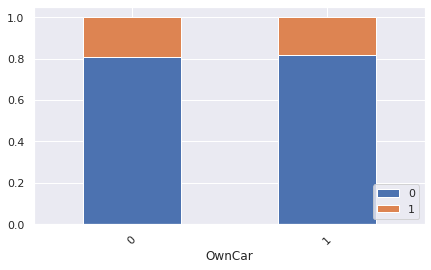

In [331]:
stacked_bar(['OwnCar'], 'ProdTaken')

**Observation:** Whether owning a car is not a major factor in buying travel package.

### ProdTaken vs MonthlyIncome

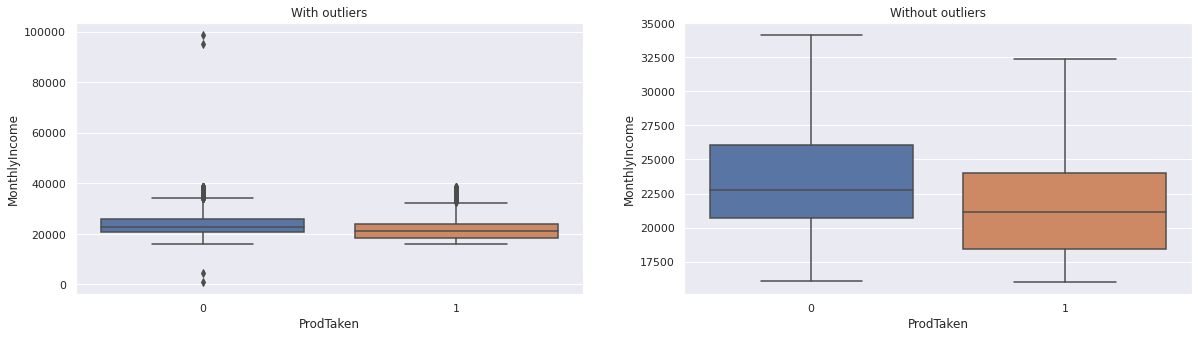

In [213]:
boxplot_with_and_without_outliers('ProdTaken', 'MonthlyIncome')

**Observation:** Customers with lower monthly income tend to buy travel package.

### ProdTaken vs PitchSatisfactionScore

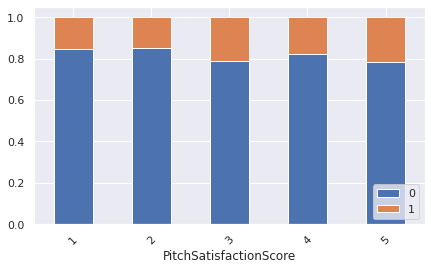

In [332]:
stacked_bar(['PitchSatisfactionScore'], 'ProdTaken')

**Observation:** In general, customers who are more satisfied with the pitch tend to buy travel package.

### ProdTaken vs ProductPitched

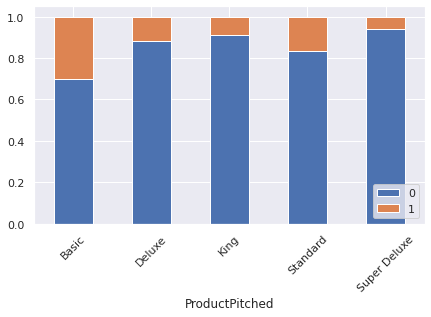

In [333]:
stacked_bar(['ProductPitched'], 'ProdTaken')

**Observation:** Customers who are pitched with Basic and Standard package are more likely to buy it.

### ProdTaken vs NumberOfFollowups

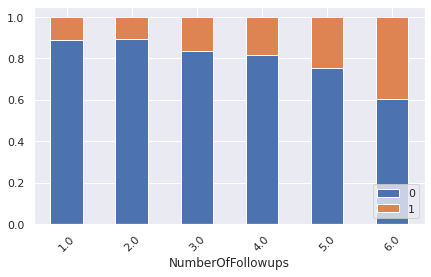

In [334]:
stacked_bar(['NumberOfFollowups'], 'ProdTaken')

**Observation:** The more follow-ups salesperson conducted after the sales pitch, the more likely a customer will buy it.

### ProdTaken vs DurationOfPitch

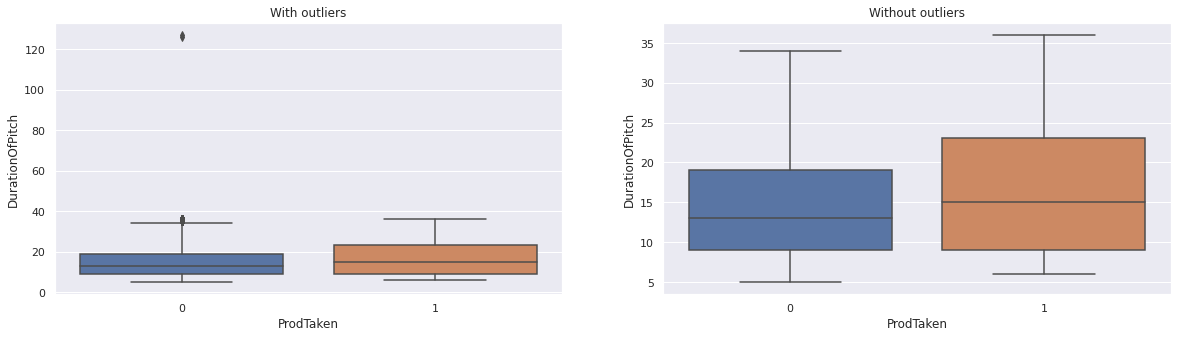

In [214]:
boxplot_with_and_without_outliers('ProdTaken', 'DurationOfPitch')

**Observation:** Customers who bought the package tend to undergo a longer sales pitch.

### Age vs NumberOfTrips

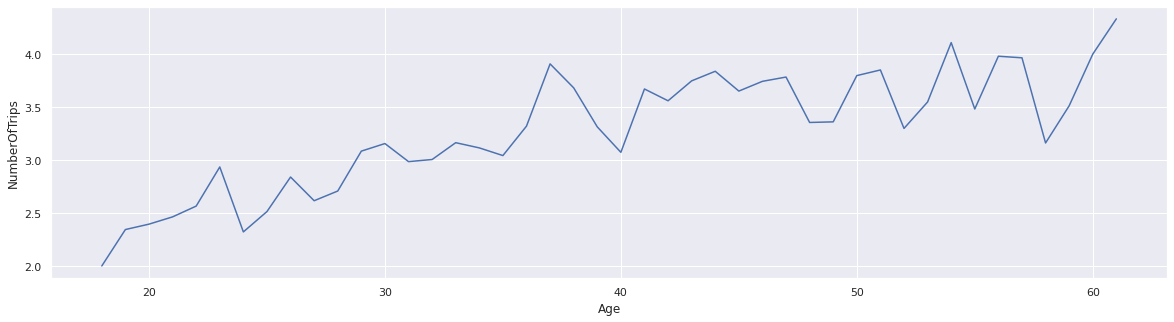

In [162]:
plt.figure(figsize = (20,5));
sns.lineplot(x = 'Age', y =  'NumberOfTrips', data = df, ci = None);

**Observation:** Older people are more active in taking trips.

### ProdTaken vs Age vs NumberOfTrips

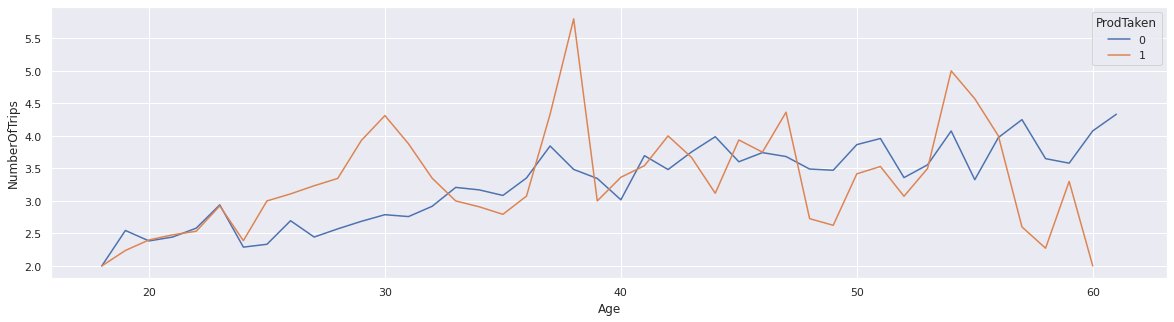

In [163]:
plt.figure(figsize = (20,5));
sns.lineplot(x = 'Age', y =  'NumberOfTrips', hue = 'ProdTaken', data = df, ci = None);

**Observation:** 
- For customers who're less than 40 years old, those who travel more frequently are more likely to buy travel package.
- For customers who're greater than 57 years old, those who travel less frequently are more likely to buy travel package.

### ProdTaken vs Gender vs MonthlyIncome

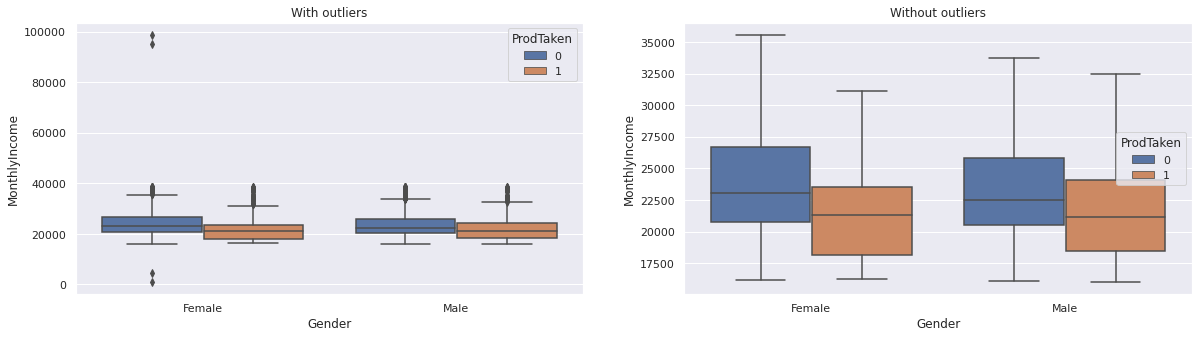

In [216]:
boxplot_with_and_without_outliers('Gender', 'MonthlyIncome', 'ProdTaken')

**Observation:** For both genders, those with lower monthly income tend to buy the travel package.

### Gender vs MonthlyIncome

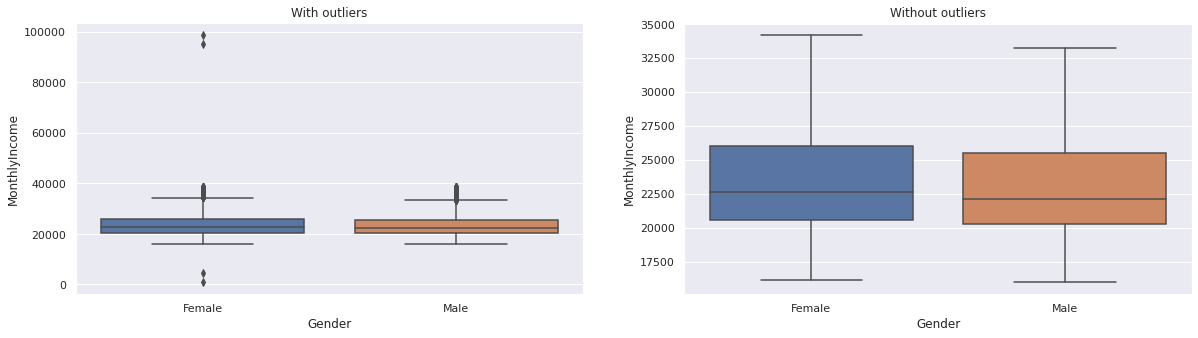

In [217]:
boxplot_with_and_without_outliers('Gender', 'MonthlyIncome')

**Observation:** The monthly income for male is slightly lower than that of female.

### ProdTaken vs Age vs MonthlyIncome

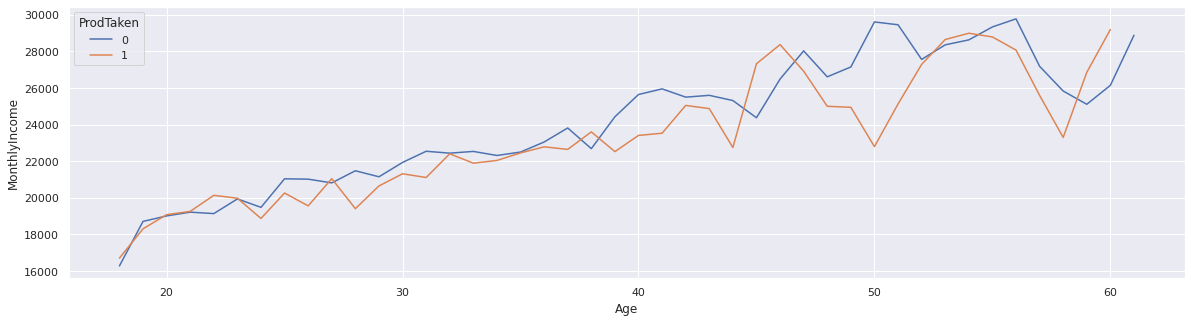

In [226]:
plt.figure(figsize = (20,5));
sns.lineplot(x = 'Age', y = 'MonthlyIncome', hue = 'ProdTaken', data = df, ci = None);

**Observation:** Monthly income increases with age. Those who don't have stable income tend to buy travel package.

### CityTier vs Gender

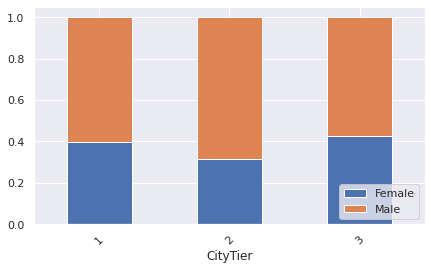

In [335]:
stacked_bar(['CityTier'], 'Gender')

**Observation:** The ratio of male to femal is the highest in Tier 2 cities.

### CityTier vs MonthlyIncome

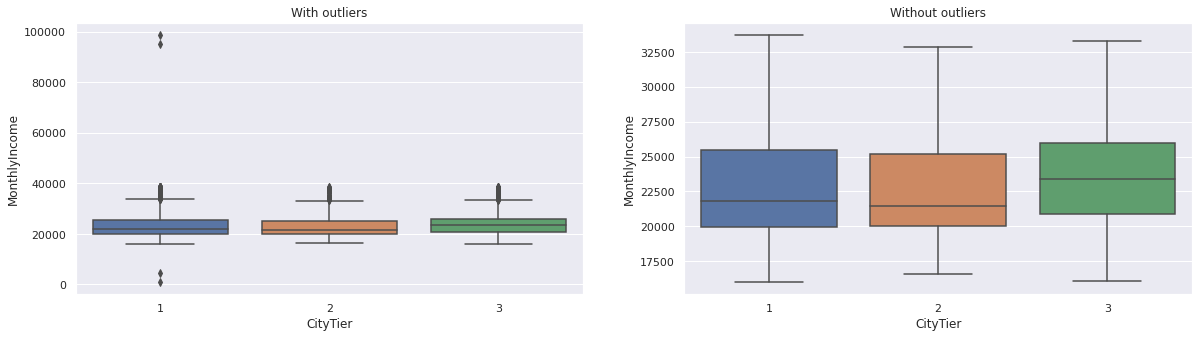

In [295]:
boxplot_with_and_without_outliers('CityTier', 'MonthlyIncome')

**Observation:** The monthly income in Tier 3 cities is the highest, but there're some outliers on both upper and lower ends in Tier 1 cities.

### CityTier vs Age

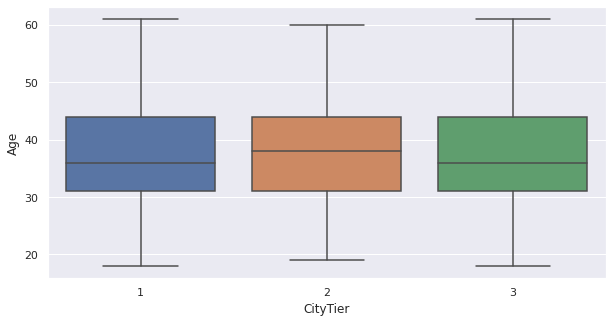

In [298]:
plt.figure(figsize = (10,5));
sns.boxplot(x = 'CityTier', y = 'Age', data = df);

**Observation:** The age distribution is alike among three types of cities.

### CityTier vs MaritalStatus

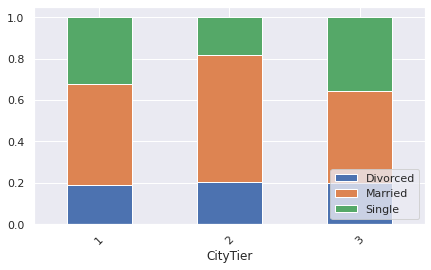

In [343]:
stacked_bar(['CityTier'], 'MaritalStatus')

**Observation:** The number of married people is the highest for cities of different tiers. But the proportion single people are higher in Tier 1 and Tier 3.

### ProdTaken vs ProductPitched vs Gender

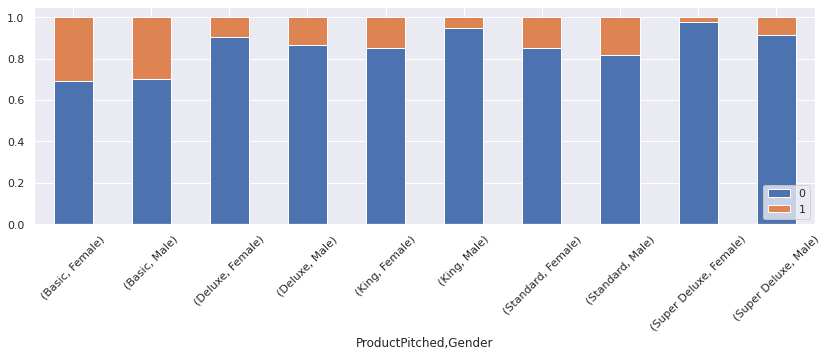

In [336]:
stacked_bar(['ProductPitched', 'Gender'], 'ProdTaken')

**Observation:** Male is more likely to buy Deluxe/ Super Deluxe package compared to female. Female is more likely to buy King package compared to male. 

### ProdTaken vs ProductPitched vs MaritalStatus

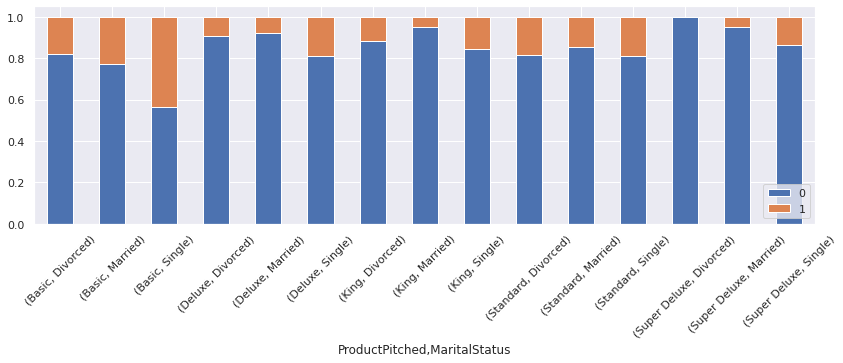

In [337]:
stacked_bar(['ProductPitched', 'MaritalStatus'], 'ProdTaken')

**Observation:** 
- Single customers are more likely to buy Basic/ Deluxe/ Super Deluxe/ King package. 
- Divorced customers don't like Super Deluxe package.
- Customers with different marital status show identical degree of interest to Standard package.

### ProdTaken vs ProductPitched vs CityTier

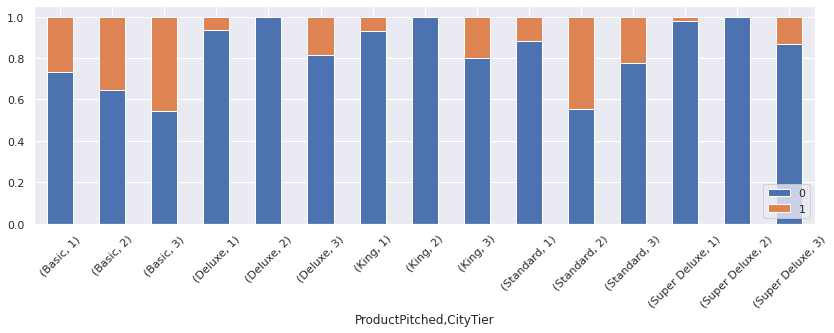

In [338]:
stacked_bar(['ProductPitched', 'CityTier'], 'ProdTaken')

**Observation:** 
- Customers from Tier 3 cities are more likely to buy any travel packages except Standard. 
- Customers from Tier 2 cities are more likely to buy Standard package, and not likely to buy Deluxe/ King/ Super Deluxe packages.

### ProdTaken vs ProductPitched vs MonthlyIncome

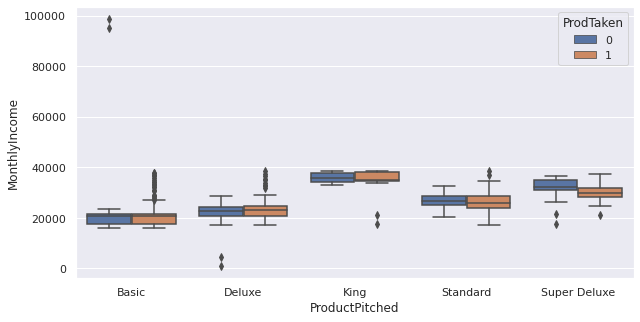

In [346]:
plt.figure(figsize = (10,5));
sns.boxplot(x = 'ProductPitched', y = 'MonthlyIncome', data = df, hue = 'ProdTaken');

**Observation:** The monthly income of buyers of travel packages in ascending order: Basic < Deluxe < Standard < Super Deluxe < King.

### ProdTaken vs ProductPitched vs Occupation

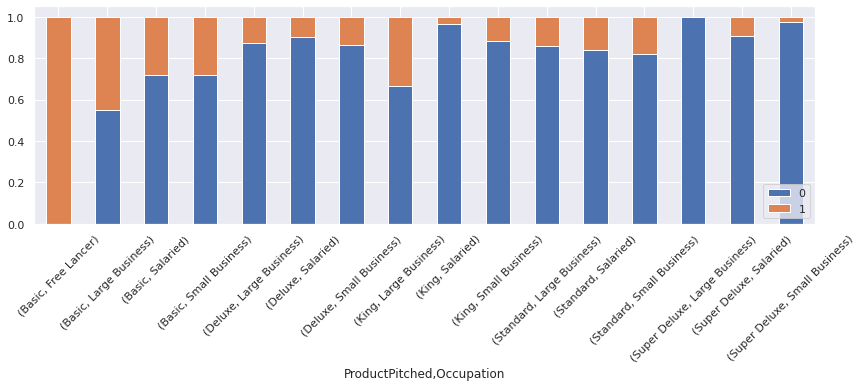

In [348]:
stacked_bar(['ProductPitched', 'Occupation'], 'ProdTaken')

**Observation:** 
- Basic package is more popular among free lancers and people at large business.
- King package is more popular among people at largel business.
- Super Deluxe package is more popular among salaried employees and disliked by people at large business.

### ProdTaken vs ProductPitched vs Designation

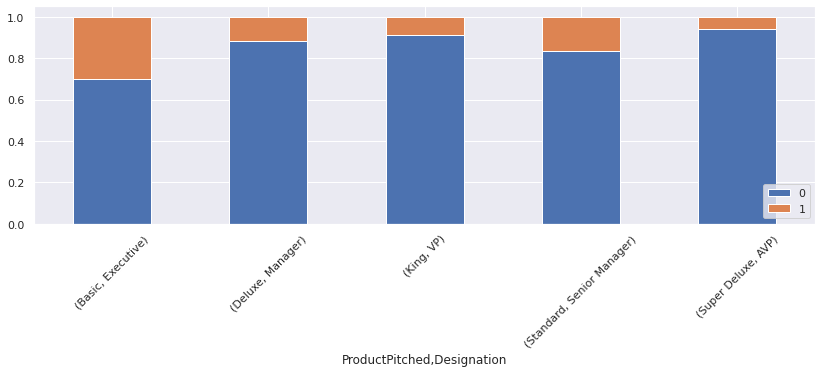

In [355]:
stacked_bar(['ProductPitched', 'Designation'], 'ProdTaken')

**Observation:** 
- Different package have different target customers:
    - Basic is for executive.
    - Deluxe is for manager.
    - Standard is for senior manager.
    - Super Deluxe is for AVP.
    - King is for VP.

### PitchSatisfactionScore vs DurationOfPitch

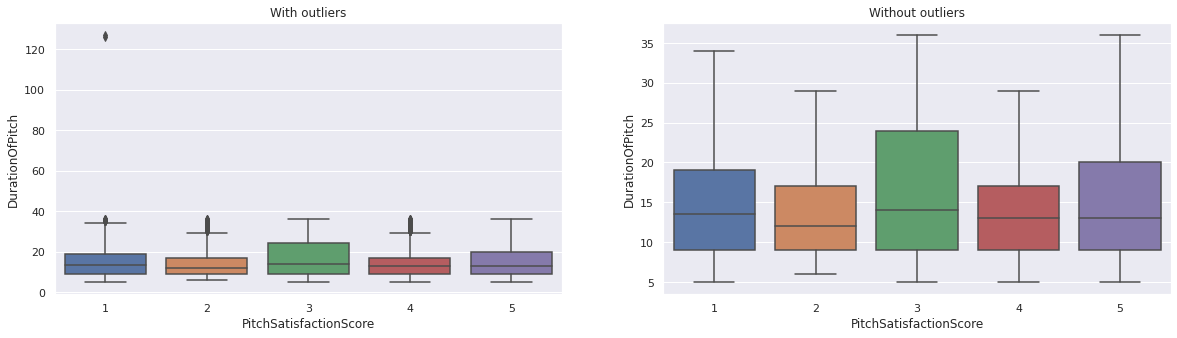

In [350]:
boxplot_with_and_without_outliers('PitchSatisfactionScore', 'DurationOfPitch')

**Observation:** The duration of pitch doesn't affect sales pitch satisfaction score.

### PitchSatisfactionScore vs NumberOfFollowups

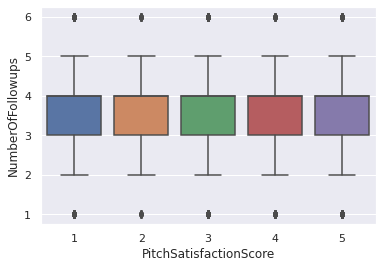

In [354]:
sns.boxplot(x = 'PitchSatisfactionScore', y = 'NumberOfFollowups', data = df);

**Observation:** The number of follow-ups doesn't affect sales pitch satisfaction score.

## Data Pre-processing

### Missing value treatment

## Conclusion

- Based on the existing records, customers who tend to buy travel packages have the following characteristics:
    - Young or single.
    - From Tier 2 or Tier 3 cities.
    - Work at large business.
    - With the job title of executive or senior manager.
    - Go for a trip with 2 - 4 companions.
    - Prefer hotels with higher ratings. 
    - Have passport.
    - Monthly income below 25000, unstable income.
    - Feel satisfied with the sales pitch of travel package.
    - The buyer of basic package or standard package.
    - Salesperson implements multiple follow-ups after the sales pitch.
    - Undergo a longer sales pitch.
   
   
- Older people are more active in taking trips.

- For customers who're less than 40 years old, those who travel more frequently are more likely to buy travel package. For customers who're greater than 57 years old, those who travel less frequently are more likely to buy travel package.

- The ratio of male to femal is the highest in Tier 2 cities. The monthly income in Tier 3 cities is the highest, but there're some outliers on both upper and lower ends in Tier 1 cities. Age distribution is alike among three types of cities. The number of married people is the highest for cities of different tiers. But the proportion single people are higher in Tier 1 and Tier 3.

- Male is more likely to buy Deluxe/ Super Deluxe package compared to female. Female is more likely to buy King package compared to male.

- Single customers are more likely to buy Basic/ Deluxe/ Super Deluxe/ King package. Divorced customers don't like Super Deluxe package. Customers with different marital status show identical degree of interest to Standard package.

- Customers from Tier 3 cities are more likely to buy any travel packages except Standard. Customers from Tier 2 cities are more likely to buy Standard package, and not likely to buy Deluxe/ King/ Super Deluxe packages.

- The monthly income of buyers of travel packages in ascending order: Basic < Deluxe < Standard < Super Deluxe < King. That's becuase different package focus on different sector of customers:
    - Basic is for executive.
    - Deluxe is for manager.
    - Standard is for senior manager.
    - Super Deluxe is for AVP.
    - King is for VP.

- Basic package is more popular among free lancers and people at large business. King package is more popular among people at largel business. Super Deluxe package is more popular among salaried employees and disliked by people at large business.

- The duration of pitch doesn't affect sales pitch satisfaction score. Neither does the numbe of follow-ups.